In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt

from itertools import cycle
from sklearn.cluster import MeanShift, estimate_bandwidth

### Dataset s1

In [39]:
with open('input/s1.txt', 'r') as f:
    X = [line.strip().split('   ') for line in f.readlines()]
    X = np.array([(int(x), int(y)) for (x,y) in X])
    
with open('input/s1-cb.txt', 'r') as f:
    # Read centroids ground truth
    y = [line.strip().split(' ') for line in f.readlines()]
    y = np.array([(int(x), int(y)) for (x,y) in y])
    

### Plot

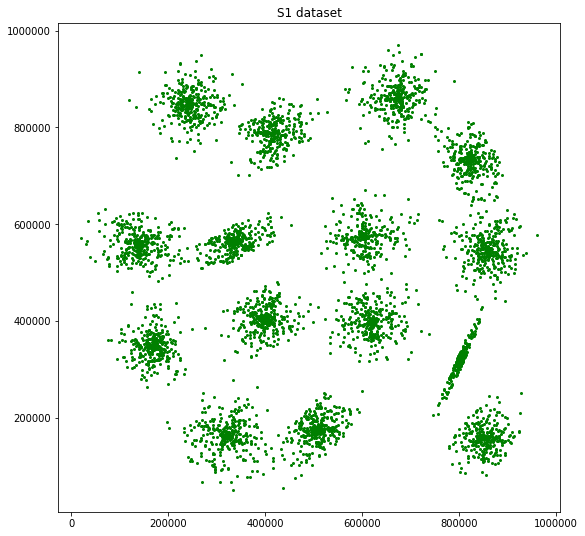

In [40]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(X[:,0], X[:, 1], 'go', markersize=2)
plt.title('S1 dataset')
plt.show()

### Predict clusters

In [60]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.04, n_samples=X.shape[0])

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 15


### Plot predicted cluster centroids

Estimated number of clusters: 15


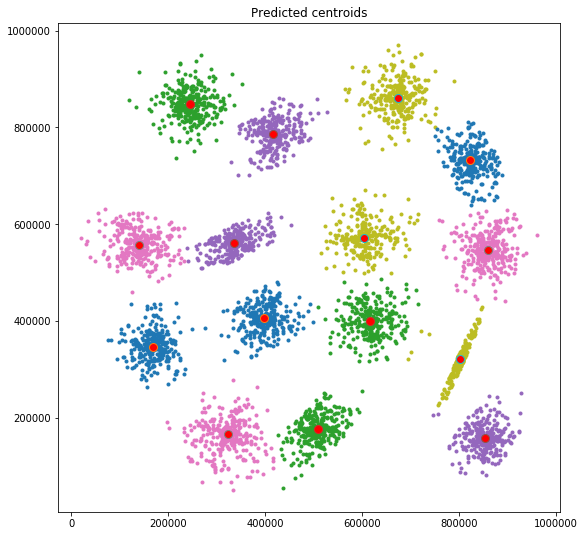

In [42]:
f, ax = plt.subplots(figsize=(9, 9))
print('Estimated number of clusters: %d' % n_clusters_)

for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='red', markersize=8)

plt.title('Predicted centroids')
plt.show()

### Mean squared error
Sort clusters by x before calculating distances

In [61]:
np.sqrt(np.sum((np.sort(cluster_centers, axis=0) - np.sort(y, axis=0))**2))/len(y)

624.2834000331338

###  Dataset g2-2-50

In [22]:
with open('input/g2-2-50.txt', 'r') as f:
    X2 = [line.strip().split('   ') for line in f.readlines()]
    X2 = np.array([(int(x), int(y)) for (x,y) in X2])
    
with open('input/g2-2-50-gt.txt', 'r') as f:
    y2 = [line.strip().split(' ') for line in f.readlines()]
    y2 = np.array([(int(x), int(y)) for (x,y) in y2])

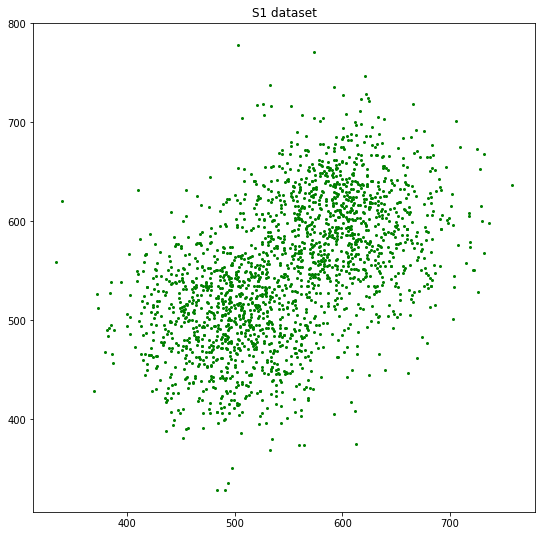

In [10]:
f, ax = plt.subplots(figsize=(9, 9))
plt.plot(X2[:,0], X2[:, 1], 'go', markersize=2)
plt.title('S1 dataset')
plt.show()

### Predict clusters

In [26]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X2, quantile=0.25, n_samples=X.shape[0])

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X2)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


Estimated number of clusters: 2


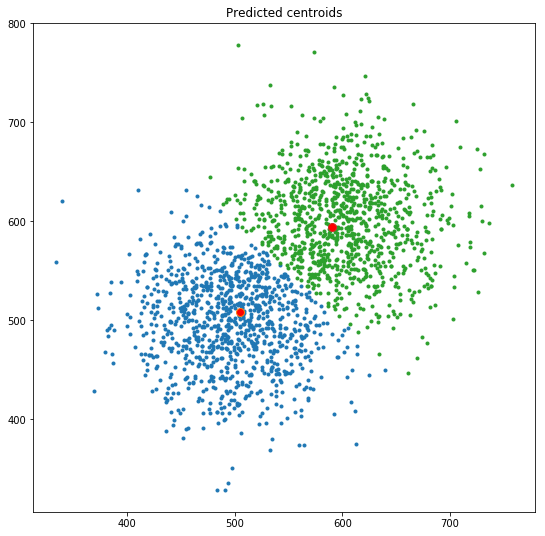

In [27]:
f, ax = plt.subplots(figsize=(9, 9))
print('Estimated number of clusters: %d' % n_clusters_)

for k in range(n_clusters_):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X2[my_members, 0], X2[my_members, 1], '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor='red', markersize=8)

plt.title('Predicted centroids')
plt.show()

### Mean squared error

In [36]:
np.sqrt(np.sum((cluster_centers-y2)**2))/len(y2)

7.463317730096462